In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import community as community_louvain

# Some of the code contains this template: 20XX. It means that the years 2007-2018 are viable

# Reading from our data-sets
df_features = pd.read_csv('large_twitch_features.csv')
df_ties = pd.read_csv('large_twitch_edges.csv')

# Convert 'created_at' to datetime format
df_features['created_at'] = pd.to_datetime(df_features['created_at'])

# Year to examine (2007 - 2018)
year = 2007

# Filter the data based on the 'created_at' column, and the current year
year_ties = df_features[df_features['created_at'].dt.year == year]

# Creating a variable for the top 10 streamers, sorted by their views
top_10_streamers = year_ties.sort_values(by='views', ascending=False).head(10)

# The df for current year, and the amount of streamers for that year
print(year_ties)
print(len(year_ties), " Streamers were created")

# Creating the graph and adding the edges
graph = nx.Graph()

graph.add_nodes_from(year_ties['numeric_id'])

for _, row in df_ties.iterrows():
    numeric_id_1 = row['numeric_id_1']
    numeric_id_2 = row['numeric_id_2']
    
    if numeric_id_1 in graph.nodes and numeric_id_2 in graph.nodes:
        graph.add_edge(numeric_id_1, numeric_id_2)

pos = nx.spring_layout(graph, k=0.1, iterations=50)

plt.figure(figsize=(8, 6))
nx.draw(graph, pos, with_labels=False, node_size=20, node_color='b', alpha=0.6, edge_color='gray', linewidths=0.1)
plt.title('Twitch Streamer Community Network (20XX)')
plt.show()

          views  mature  life_time created_at  updated_at  numeric_id  \
294         713       0       4149 2007-05-22  2018-09-30         294   
599        4998       1       4106 2007-07-13  2018-10-09         599   
863        2384       0       4023 2007-10-07  2018-10-12         863   
2750       1037       1       4022 2007-09-29  2018-10-03        2750   
3035        129       1       3895 2007-10-08  2018-06-07        3035   
...         ...     ...        ...        ...         ...         ...   
164770      946       1       3984 2007-09-09  2018-08-06      164770   
164817      669       1       4060 2007-08-25  2018-10-06      164817   
165474    20324       0       4014 2007-10-14  2018-10-10      165474   
165738  5462210       0       3991 2007-11-08  2018-10-12      165738   
167540     7262       0       4059 2007-09-01  2018-10-12      167540   

        dead_account language  affiliate  
294                0       EN          0  
599                0       EN        

The average number of edges for nodes in the graph is: 7.976499441418795
Top 10 streamers with the most views in 20XX:
        numeric_id      views language
52703        52703  206941623       EN
58773        58773   25063546       EN
82200        82200   24316020       EN
160946      160946   23273302       EN
73966        73966   16989772       EN
31140        31140   10667564       EN
56196        56196   10167502       EN
133411      133411    8626762       EN
82079        82079    7061792       EN
156808      156808    6306325       EN
[32, 18, 2, 2, 1, 9, 2, 5, 0, 0]
[0.5525413288843035, 0.3649570564606509, 0.014854887329600337, 0.022743166597097363, 0.07768335725083068, 0.14479805224978404, 0.08066885026500051, 0.07036662065733752, 2.0933531263416285e-22, 2.0933531263416285e-22]
[0.3, 0.2578125, 0.14798206278026907, 0.13983050847457626, 0.18857142857142858, 0.1907514450867052, 0.19298245614035087, 0.1783783783783784, 0.0, 0.0]
Average eigenvector centrality: 0.1328613319694605


c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\networkx\drawing\nx_pylab.py:433: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


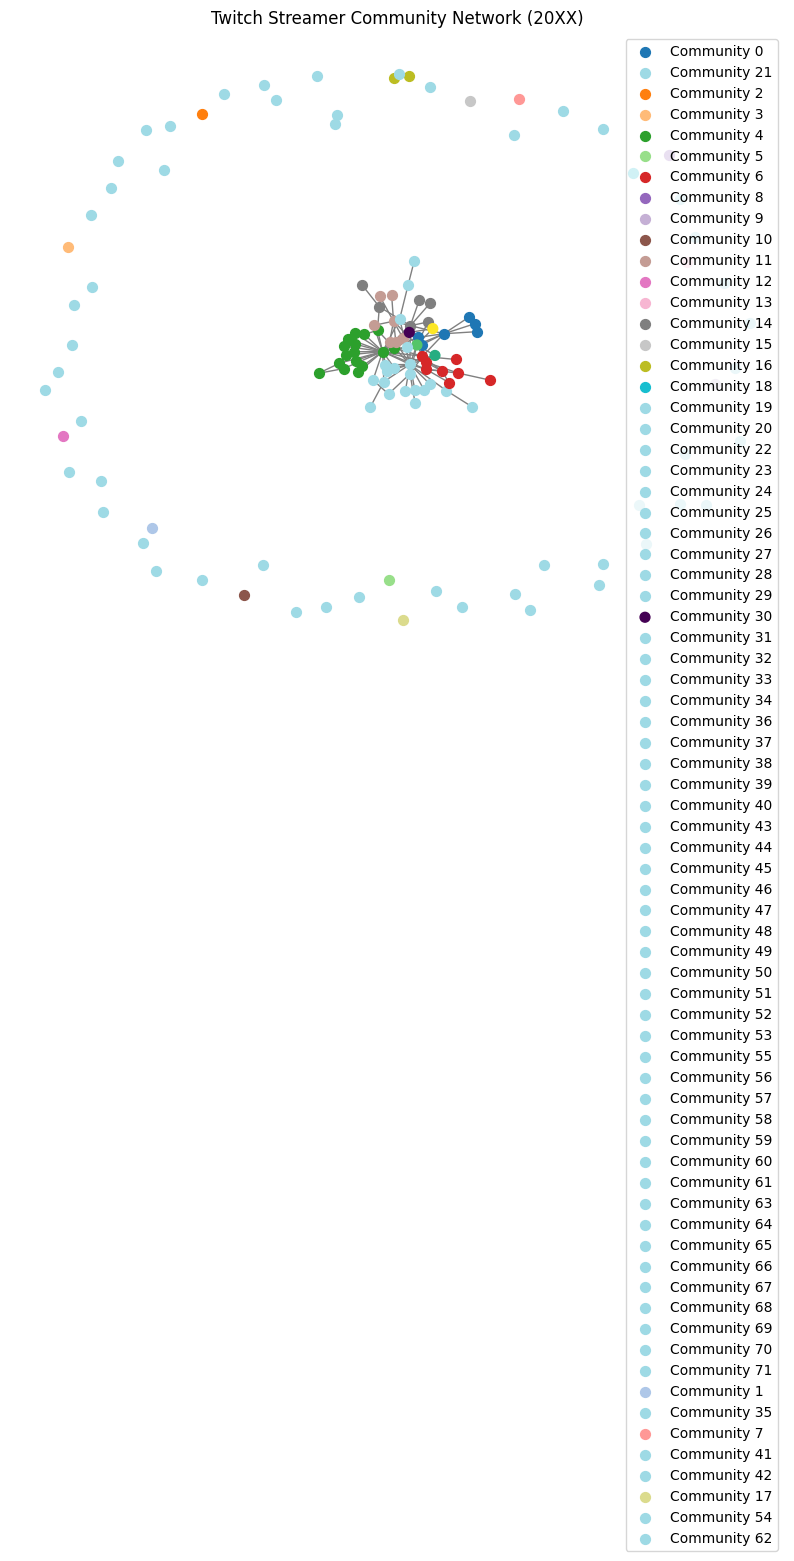

In [2]:
# Average number of edges, for that year
average_edges_per_node = nx.average_degree_connectivity(graph)
overall_average_edges = sum(average_edges_per_node.values()) / len(average_edges_per_node)
print("The average number of edges for nodes in the graph is:", overall_average_edges)

# Displaying the top 10 streamers
print("Top 10 streamers with the most views in 20XX:")
print(top_10_streamers[['numeric_id', 'views','language']])

# Calculating the centrality measures: Eigenvector and Closeness (for top 10)
eigenvector_centrality_values = nx.eigenvector_centrality(graph)
closeness_centrality_values = nx.closeness_centrality(graph)
edges_count_top_10 = []
eigenvector_centrality_top_10 = []
total_closeness_top_10 = []
for _, row in top_10_streamers.iterrows():
    numeric_id = row['numeric_id']
    edges_count_top_10.append(graph.degree[numeric_id])
    eigenvector_centrality_top_10.append(eigenvector_centrality_values[numeric_id])
    total_closeness_top_10.append(closeness_centrality_values[numeric_id])

print(edges_count_top_10)
print(eigenvector_centrality_top_10)
print(total_closeness_top_10)

# Their average
average_eigenvector = sum(eigenvector_centrality_top_10) / len(eigenvector_centrality_top_10)
average_closeness = sum(total_closeness_top_10) / len(total_closeness_top_10)

print(f"Average eigenvector centrality: {average_eigenvector}")
print(f"Average closeness centrality: {average_closeness}")

# Top 10 streamers's total views for that year
total_views_top_10 = top_10_streamers['views'].sum()
print(f"Total number of views for the top 10 streamers in {year}: {total_views_top_10}")

# Calculations of affiliates and number of streamers, within particular years
years_2007_to_2012_data = df_features[
    (df_features['created_at'].dt.year >= 2007) &
    (df_features['created_at'].dt.year <= 2012)
]

years_2013_to_2018_data = df_features[
    (df_features['created_at'].dt.year >= 2013) &
    (df_features['created_at'].dt.year <= 2018)
]

sum_affiliate_2007_to_2012 = years_2007_to_2012_data['affiliate'].sum()
print(f"Sum of 'Affiliate' column for years 2007 to 2012: {sum_affiliate_2007_to_2012}")

sum_affiliate_2013_to_2018 = years_2013_to_2018_data['affiliate'].sum()
print(f"Sum of 'Affiliate' column for years 2013 to 2018: {sum_affiliate_2013_to_2018}")

num_streamers_2007_to_2012 = years_2007_to_2012_data['numeric_id'].nunique()
print(f"Number of streamers created between 2007 and 2012: {num_streamers_2007_to_2012}")

num_streamers_2013_to_2018 = years_2013_to_2018_data['numeric_id'].nunique()
print(f"Number of streamers created between 2013 and 2018: {num_streamers_2013_to_2018}")

# Average views for affiliates
average_views_affiliate = df_features[df_features['affiliate'] == 1]['views'].mean()

# Non-affiliate
average_views_non_affiliate = df_features[df_features['affiliate'] == 0]['views'].mean()

print(f"Average views for affiliate streamers: {average_views_affiliate:.2f}")
print(f"Average views for non-affiliate streamers: {average_views_non_affiliate:.2f}")

# Detect communities using Louvain community detection algorithm
partition = community_louvain.best_partition(graph)

total_affiliate_streamers = df_features['affiliate'].sum()

print(f"Total number of affiliate streamers: {total_affiliate_streamers}")

non_affiliate_streamers = df_features[df_features['affiliate'] == 0]

# Calculate the total number of non-affiliate streamers
total_non_affiliate_streamers = len(non_affiliate_streamers)

print(f"Total number of non-affiliate streamers: {total_non_affiliate_streamers}")

affiliate_streamers = df_features[df_features['affiliate'] == 1]
non_affiliate_streamers = df_features[df_features['affiliate'] == 0]

# Get the number of communities and the community memberships for each node
num_communities = len(set(partition.values()))
community_memberships = {}
for node, comm_id in partition.items():
    if comm_id not in community_memberships:
        community_memberships[comm_id] = [node]
    else:
        community_memberships[comm_id].append(node)

# Visualize the communities using different colors for nodes within each community
pos = nx.spring_layout(graph, k=0.1, iterations=50)

plt.figure(figsize=(10, 8))
for comm_id, nodes in community_memberships.items():
    nx.draw_networkx_nodes(graph, pos, nodelist=nodes, node_color=plt.cm.tab20(comm_id), node_size=50, label=f'Community {comm_id}')
nx.draw_networkx_edges(graph, pos, edge_color='gray')
plt.title('Twitch Streamer Community Network (20XX)')
plt.legend()
plt.axis('off')
plt.show()

